In [19]:
import torch
from torch import nn
from d2l import torch as d2l

model = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=3, stride=2, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Conv2d(96, 256, kernel_size=3, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Flatten(),
    nn.Linear(1024 , 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)
)

In [20]:
# 打印每层的情况
X = torch.rand((1, 1, 28, 28), dtype=torch.float32)
for layer in model:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape: \t', X.shape)

Conv2d output shape: 	 torch.Size([1, 96, 14, 14])
ReLU output shape: 	 torch.Size([1, 96, 14, 14])
MaxPool2d output shape: 	 torch.Size([1, 96, 7, 7])
Conv2d output shape: 	 torch.Size([1, 256, 9, 9])
ReLU output shape: 	 torch.Size([1, 256, 9, 9])
MaxPool2d output shape: 	 torch.Size([1, 256, 4, 4])
Conv2d output shape: 	 torch.Size([1, 384, 4, 4])
ReLU output shape: 	 torch.Size([1, 384, 4, 4])
Conv2d output shape: 	 torch.Size([1, 384, 4, 4])
ReLU output shape: 	 torch.Size([1, 384, 4, 4])
Conv2d output shape: 	 torch.Size([1, 256, 4, 4])
ReLU output shape: 	 torch.Size([1, 256, 4, 4])
MaxPool2d output shape: 	 torch.Size([1, 256, 2, 2])
Flatten output shape: 	 torch.Size([1, 1024])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output shape: 	 torch.Size([1

In [21]:
import torchvision
from torch.utils import data
from torchvision import transforms
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True),
            data.DataLoader(mnist_test, batch_size, shuffle=False))

batch_size = 128
train_iter, test_iter = load_data_fashion_mnist(batch_size)
# train_iter, test_iter = load_data_fashion_mnist(batch_size, resize=224)

loss 0.191, train acc 0.930, test acc 0.906
1988.6 examples/sec on cuda:0


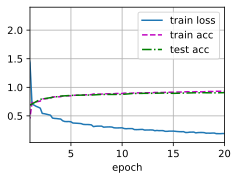

In [22]:
lr, num_epochs = 0.05, 20
d2l.train_ch6(model, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())